##Regresión Logística - Ejemplo 2

Desarrollaremos un modelo para predecir si un paciente tiene cáncer de seno o no, de acuerdo a las características del tumor. Para este análisis vamos a utilizar uno de los dataset que se encuentra disponible en la librería scikit-learn y es el correspondiente a Breast Cancer o cáncer de seno.

In [ ]:
#Paso 1: Se importan la librerias a utilizar
from sklearn import datasets
import pandas as pd

In [ ]:
#Paso 2: Importamos los datos de la misma librería de scikit-learn
dataset = datasets.load_breast_cancer()

In [ ]:
#Paso 3: Revisaremos es la información contenida dentro del dataset
print('Información en el dataset:')
print(dataset.keys())

Información en el dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


> 'data' Son los datos Independientes

> 'target' Son las etiquetas o respuestas

> 'target_names' Son los nombres de las variables que se encuentran en la columna "target"

> 'DESCR' Es la descripción del dataset

> 'features_name' Nombre de cada una de las columnas del dataset







In [ ]:
#Paso 4: Verificamos las características del dataset
print('Características del dataset:')
print(dataset.DESCR)

Características del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

In [ ]:
#Usando la librería Pandas, podemos mostrar de manera organizada algunos de los registros de entrada
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [ ]:
#Paso 5: Definimos las variables de “X” y “y” que vamos emplear en nuestro modelo.

#Para “X” vamos a utilizar todas las variables que se encuentran dentro de “data” (Características Numéricas)
X = dataset.data
#Para “y” será igual a los datos correspondientes en el “target” (Ceros y Unos)
y = dataset.target

In [ ]:
#Paso 6: Procedemos a utilizar función train_test_split para separar los datos en datos de prueba y datos de entrenamiento
from sklearn.model_selection import train_test_split

In [ ]:
#Paso 7: Separo los datos: Test=20%, Train=80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Paso 8: Ahora normalizamos todos los datos usando el método StandarScaler de la librería scikit-learn
from sklearn.preprocessing import StandardScaler
normalizar = StandardScaler()

In [ ]:
#Paso 9: Para realizar la normalización de los datos utilizaremos el método fit_transform, esta instrucción realiza el calculo respectivo y a su vez transforma y devuelve los datos ya escalados.
X_train = normalizar.fit_transform(X_train)
X_test = normalizar.transform(X_test)

In [ ]:
#Paso 10: Importamos la clase LogisticRegresion de scikit-learn (Aquí está el algoritmo de Regresión Logística)
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression()

In [ ]:
#Paso 11: Entrenamos el algoritmo de Regresión Logística con los datos
regresion_logistica.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Paso 12: Finalmente, Realizamos una predicción con los datos de prueba que habíamos guardado en el Paso 7
y_pred = regresion_logistica.predict(X_test)

In [ ]:
print("Salidas Predichas:",y_pred)

Salidas Predichas: [0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1
 0 0 1]


In [ ]:
print("Salidas Reales:",y_test)

Salidas Reales: [0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0
 0 0 1]


In [ ]:
#Paso 13: Ahora obtenemos la matriz de confusión utilizando la librería metrics de scikit learn y el modulo confusion-matrix.

####¿Qué es una matriz de confusión?
es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos. Es una matriz de 2x2 y presenta las siguientes opciones:

1) Verdadero Positivo [VP] = Data(1) Algoritmo(1) ACIERTO

2) Verdadero Negativo [VN] = Data(0) Algoritmo(0) ACIERTO

3) Falso Positivo [FP] = Data(0) Algoritmo(1) ERROR

4) Falso Negativo [FN] = Data(1) Algoritmo(0) ERROR

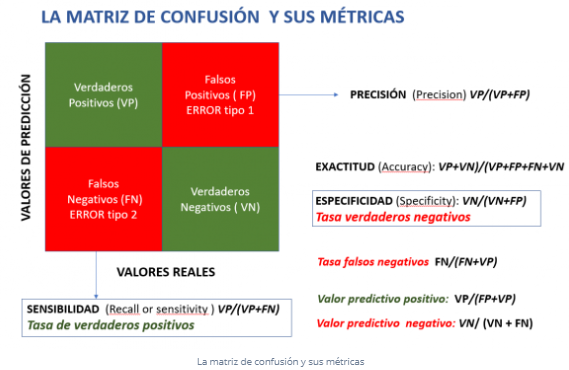

Fuente: https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

In [ ]:
#Paso 13: Ahora obtenemos la matriz de confusión utilizando la librería metrics de scikit learn y el modulo confusion-matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
#Paso 14: Aplicamos la matriz de confusión a los datos de reales y los que hemos predicho con anterioridad.
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[40  3]
 [ 0 71]]


In [ ]:
#Paso 15: Para el Cálculo de la precisión del modelo usamos precision_score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9594594594594594


In [ ]:
#Paso 16: Para el Cálculo de la Exactitud del modelo usamos accuracy_score
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9736842105263158


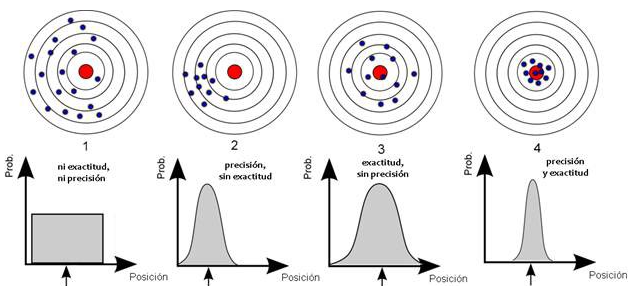

Fuente: https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

###ANEXO

Maneras de mejorar el código

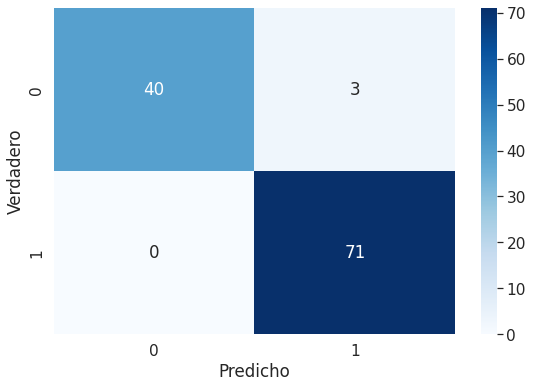

In [ ]:
#Esto es una buena forma de graficar matrices en general
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
data=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name="Verdadero"
df_cm.columns.name="Predicho"
plt.figure(figsize=(9,6))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues",annot=True)
plt.show()